In [3]:
import pandas as pd
import numpy as np


from tqdm import tqdm, tqdm_notebook

from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss


%matplotlib inline

In [4]:
X, y = datasets.load_digits()["data"], datasets.load_digits()["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = False)

### Simple KNN classifier without weights and with minkowski metric

Attention! Slow as molasses in January :-(

In [12]:
class KNeighborsClassifier():
    
    def __init__(self, k=1, q=2):
        self.k = k
        self.q = q
        self.X_train = None
        self.y_train = None
        
    def distance(self, dot1, dot2):
        return (np.sum(abs((dot1 - dot2))**self.q))**1/self.q
    
    def _max_k_class(self, distance_tuple):
        distance_list.sort()
        
        class_list = [i[1] for i in distance_tuple[:self.k]]
        counts = pd.value_counts(class_list)
        return counts.idxmax()
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print("Lazy training: OK")
    
    def predict(self, X):
        predictions = []
        
        for pred_vec in X:
            pred_vec_dist = []
            
            for index, train_vec in enumerate(self.X_train):
                pred_vec_dist.append((self.distance(pred_vec, train_vec), self.y_train[index]))
                
            predictions.append(self._max_k_class(pred_vec_dist))
        return predictions        

In [15]:
acc_test = []
acc_train = []
for i in tqdm_notebook(np.arange(1, 30, 2)):  
    knn = KNeighborsClassifier(k = i)
    knn.fit(X_train, y_train)
    acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
    acc_train.append(accuracy_score(y_train, knn.predict(X_train)))

Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK
Lazy training: OK


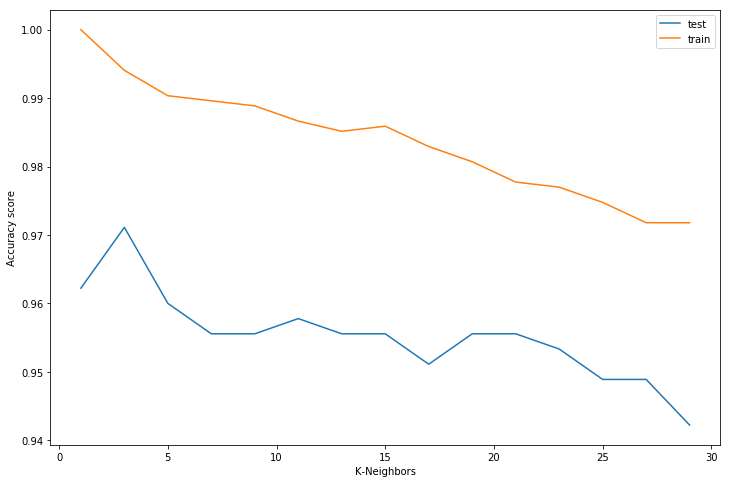

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(1, 30, 2), acc_test, label = "test")
plt.plot(np.arange(1, 30, 2), acc_train, label = "train")
plt.xlabel("K-Neighbors")
plt.ylabel("Accuracy score")
plt.legend()